In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## loooking around the df just to get an idea 

In [39]:
df = pd.read_csv('data_cleaned/features.csv')
print(df.columns)

Index(['VWAP', 'ask_moment_1', 'ask_moment_2', 'ask_moment_3',
       'best_ask_price', 'best_ask_volume', 'best_bid_price',
       'best_bid_volume', 'bid_ask_spread', 'bid_moment_1', 'bid_moment_2',
       'bid_moment_3', 'entropy_on_ask', 'entropy_on_bid', 'mid_price',
       'order_flow_imbalance', 'time', 'total_ask_volume', 'total_bid_volume'],
      dtype='object')


<AxesSubplot:xlabel='entropy_on_bid', ylabel='Count'>

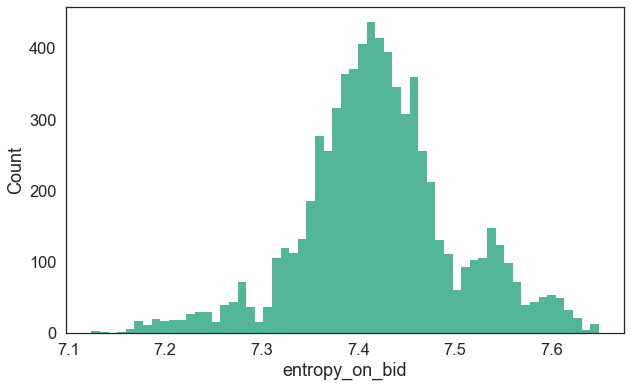

In [67]:
sns.set_theme(style="white", palette="Dark2", font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x='entropy_on_bid', data=df, ax=ax, linewidth=0)
# ax.set_xlim(0, 0.4*1e7)
# ax.set_yscale('log')

<AxesSubplot:xlabel='time', ylabel='bid_ask_spread'>

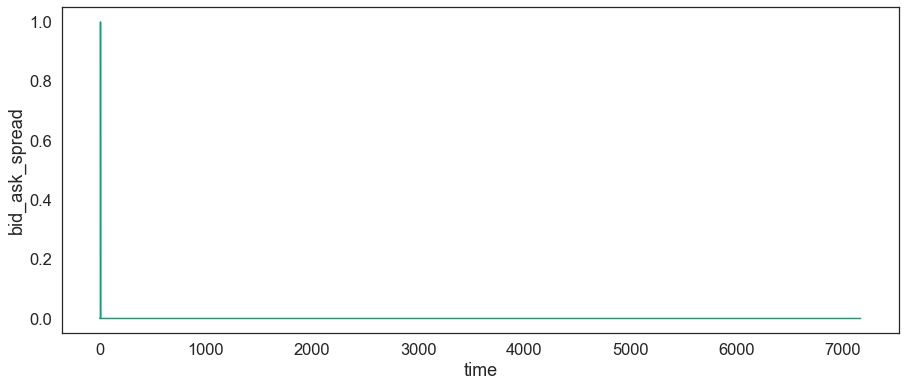

In [43]:
sns.set_theme(style="white", palette="Dark2", font_scale=1.5)
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='time', y ='bid_ask_spread', data=df, ax=ax)